In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from filloutVentilationStats import *
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
from cycler import cycler
import plotly.express as px
import plotly

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

category =  "config2"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [2]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4
T_ref = 5
rho = 1.225

velocity_scaling = 1/velTenMeters
ventilation_scaling = velocity_scaling/(window_dim**2)

@utils.no_kwargs
@utils.dict_apply
def norm_vel(df):
    return df * velocity_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_vent(df):
    return df * ventilation_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_Temp(df):
    return df / T_ref

@utils.no_kwargs
@utils.dict_apply
def get_Cp(df):
    return df / (0.5 * rho * velTenMeters**2)

@utils.no_kwargs
@utils.dict_apply
def abs_values(df):
    return df.abs()

@utils.no_kwargs
@utils.dict_apply
def flip_data(df):
    return -df

In [3]:
run = 46
probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [4]:
start = 40000# 30000
stop = -1
by = 1

In [5]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")


In [6]:
nameKey = read_probes_file_switch(f"{probes_dir}/../locations/nameKey_extraProbe.txt")
nameKey = nameKey.compute()

extraProbe = nameKey.copy()
extraProbe = pd.concat([extraProbe, probes.locations["extraProbe"]], axis = "columns")
df = probes.statistics(
    names = [name for name in  probes.probe_names if "extraProbe" in name], 
    steps = [probes.probe_steps[stop]],
    quants = ["comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)", "mag(u)_avg", "p_avg", "D_avg", "S_avg", "T_avg"],
    parrallel=False
    )
extraProbe = pd.concat([extraProbe, df], axis = "columns")
extraProbe.set_index(0, inplace=True)
extraProbe = extraProbe.rename(columns=lambda x: f"EP_{x}")
extraProbe = extraProbe.rename(index=lambda x: x.replace("extraProbe_", ''))
display(extraProbe)

# del probes

processing data took 10 seconds


EP_x  EP_y    EP_z  EP_D_avg  EP_S_avg  EP_T_avg  \
0                                                                          
roof_sl                44.00  12.0   60.00  0.001020  0.006278  0.021571   
xwindow_0-0_sl         36.55   1.5   58.00  0.000986  0.006833  0.025895   
zwindow_0-0_sl         40.00   1.5   54.55  0.001074  0.006041  0.021533   
xwindow_0-1_sl         36.55   1.5   62.00  0.001732  0.009811  0.040664   
zwindow_0-1_sl         40.00   1.5   65.45  0.001880  0.021879  0.101759   
...                      ...   ...     ...       ...       ...       ...   
zwindow_0-1_h_0-2_Bxz -56.00   1.5 -113.45  0.001329  0.006657  0.024965   
zwindow_1-0_h_0-2_Bxz -60.00   1.5 -102.55  0.004593  0.021433  0.099415   
zwindow_1-1_h_0-2_Bxz -60.00   1.5 -113.45  0.001092  0.005879  0.021104   
zwindow_2-0_h_0-2_Bxz -64.00   1.5 -102.55  0.024495  0.110462  0.545668   
zwindow_2-1_h_0-2_Bxz -64.00   1.5 -113.45  0.001405  0.007365  0.028433   

                       EP_comp(u_avg,0)  EP_comp(u_avg,1)  EP_comp(u_avg,2)  \
0                                                                             
roof_sl                        0.903852          0.045342          1.077090   
xwindow_0-0_sl                 0.081421         -0.152485          0.870609   
zwindow_0-0_sl                 0.623834         -0.048749          0.131952   
xwindow_0-1_sl                -0.146850         -0.259822          0.850690   
zwindow_0-1_sl                 0.327162         -0.273910          0.017727   
...                                 ...               ...               ...   
zwindow_0-1_h_0-2_Bxz          0.653699         -0.108030         -0.087738   
zwindow_1-0_h_0-2_Bxz         -0.013746          0.080574         -0.230858   
zwindow_1-1_h_0-2_Bxz          0.734194         -0.125748         -0.000052   
zwindow_2-0_h_0-2_Bxz         -0.092491          0.022202          0.262868   
zwindow_2-1_h_0-2_Bxz          0.492971          0.051811          0.501732   

                       EP_mag(u)_avg  EP_p_avg  
0                                               
roof_sl                     1.467772 -0.079828  
xwindow_0-0_sl              0.961501 -0.131802  
zwindow_0-0_sl              0.742188  0.187533  
xwindow_0-1_sl              0.978930 -0.143065  
zwindow_0-1_sl              0.617656 -0.543370  
...                              ...       ...  
zwindow_0-1_h_0-2_Bxz       0.822956  0.093331  
zwindow_1-0_h_0-2_Bxz       0.451996 -0.350673  
zwindow_1-1_h_0-2_Bxz       0.829005  0.149464  
zwindow_2-0_h_0-2_Bxz       0.518720 -0.468905  
zwindow_2-1_h_0-2_Bxz       0.803310  0.403541  

[240 rows x 11 columns]

In [7]:
qoisOutputed = [
    "mass_flux",
    "mass_flux(p)",
    "mass_flux(T)",
    "mass_flux(D)",
    "mass_flux(S)",
    "sn_prod(u)",
    "sn_prod(p)",
    "sn_prod(abs(u))",
    "sn_prod(u**2)"
]
qois = qoisOutputed

# probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type="csv")
# probes.to_parquet(overwrite = True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type = "parquet")



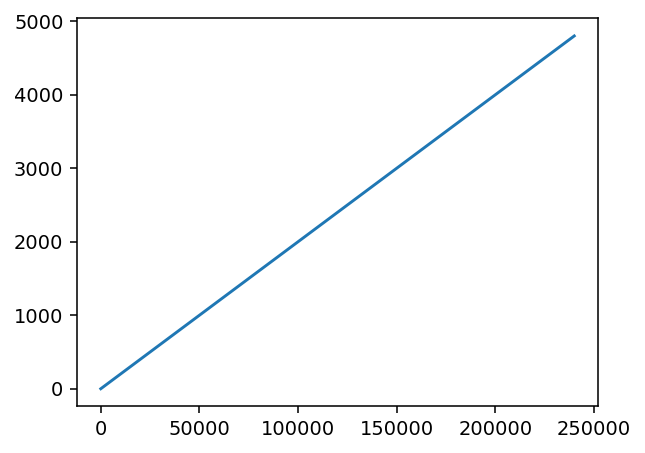

In [8]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [9]:
# plt.figure()
# foo_mass = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[0])].compute()
# foo_u = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[1])].compute()
# foo_area = probes.areas["xwindow_0-0_h_3-0_Bx"]
# plt.plot(foo_mass.values/foo_u.values)
# plt.ylim(0,1.225*2)


In [10]:
# plt.figure()
# N = len(foo_mass)
# f, E = sp.signal.welch(foo_mass.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
# plt.loglog(f, E)

## Check Qois


processing data took 1 seconds
processing data took 0 seconds
processing data took 0 seconds


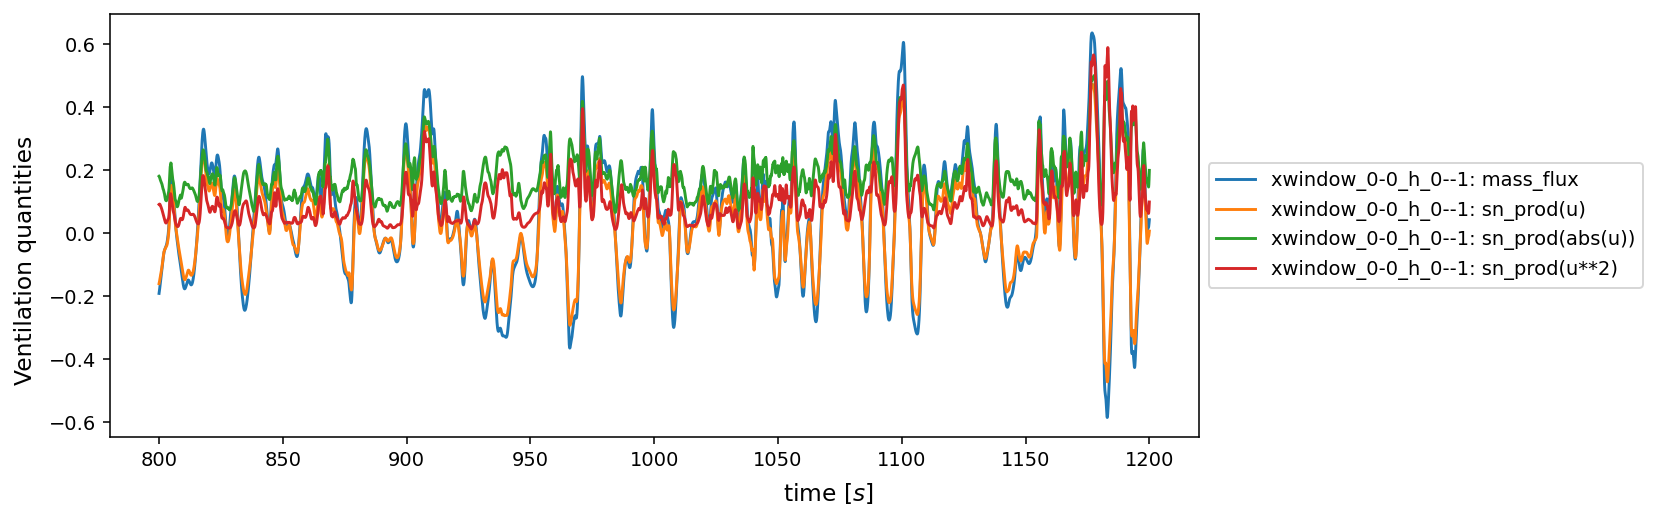

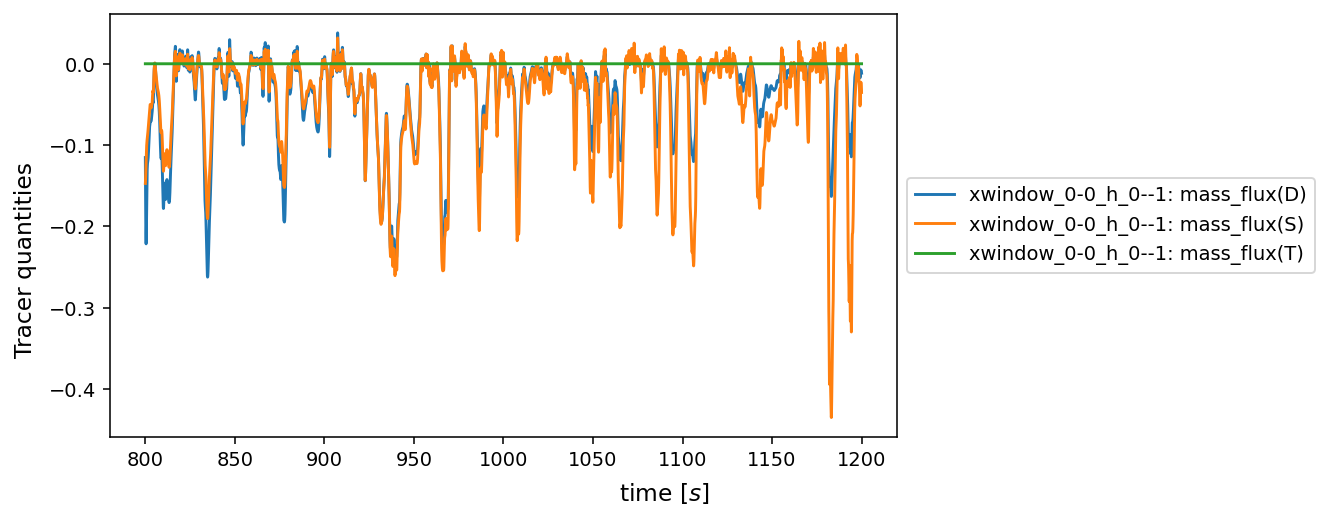

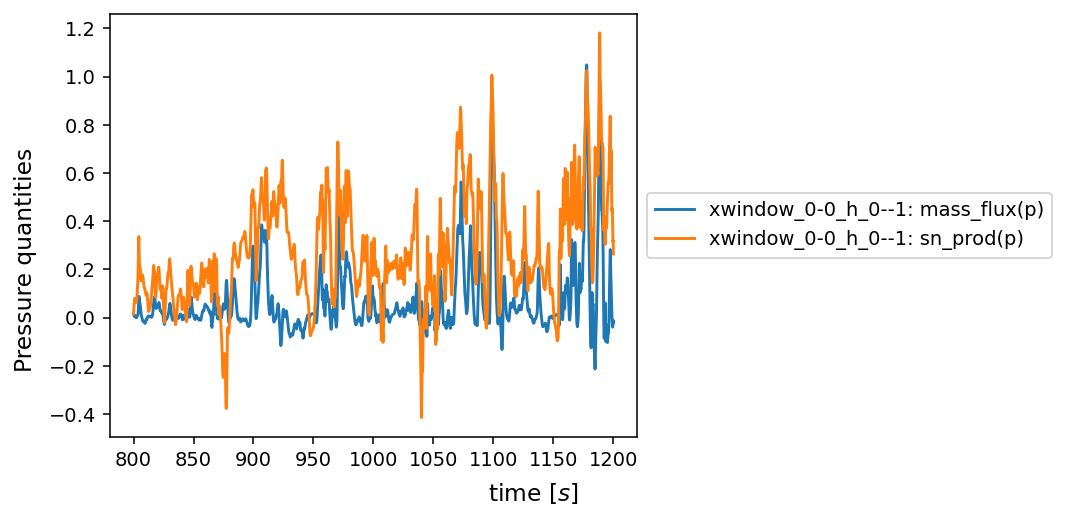

In [11]:
(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux", "sn_prod(u)", "sn_prod(abs(u))", "sn_prod(u**2)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Ventilation quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux(D)", "mass_flux(S)", "mass_flux(T)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Tracer quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow_" in name][0:1], 
    steps = probes.probe_steps[start:60000:by],
    quants = ["mass_flux(p)", "sn_prod(p)"],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Pressure quantities',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : probes.probe_times,
        },
    parrallel=True
    )

In [12]:
qois.remove("mass_flux(p)")
qois

['mass_flux',
 'mass_flux(T)',
 'mass_flux(D)',
 'mass_flux(S)',
 'sn_prod(u)',
 'sn_prod(p)',
 'sn_prod(abs(u))',
 'sn_prod(u**2)']

## X Flow


In [13]:
@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2" and run < 40:
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bz" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "xwindow_" in name], 
#     steps = probes.probe_steps[start:60000:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_blocks],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_norm_blocks],
    parrallel=False
    )

x_mean = df.map(probePost.time_average)
x_rms = df.map(probePost.time_rms)
x_net = df.map(abs)
x_net = x_net.map(probePost.time_average)

dfs_calced = [x_mean, x_rms, x_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

x_flowStats = pd.concat(dfs_calced, axis = "columns")


processing data took 64 seconds


In [14]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows', bbox = "tight")

# x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
# x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
# x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


In [15]:
@utils.no_kwargs
def norm_norm_windows(data_dict):
    return probePost.mul_names(data_dict, [name for name in probes.probe_names if fnmatch(name, "*window_?-1*")], -1)

@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2" and run < 40:
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bx" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "zwindow" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_windows, norm_norm_blocks],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_norm_windows, norm_norm_blocks],
    parrallel=False
    )

z_mean = df.map(probePost.time_average)
z_rms = df.map(probePost.time_rms)
z_net = df.map(abs)
z_net = z_net.map(probePost.time_average)

dfs_calced = [z_mean, z_rms, z_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

z_flowStats = pd.concat(dfs_calced, axis = "columns")

processing data took 195 seconds


In [16]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows', bbox_inches = "tight")

# z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
# z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
# z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

## Y Flow


In [17]:
# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "skylight" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_skylights],
#     parrallel=True
#     )

df = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [flip_data, norm_norm_blocks],
    parrallel=False
    )

y_mean = df.map(probePost.time_average)
y_rms = df.map(probePost.time_rms)
y_net = df.map(abs)
y_net = y_net.map(probePost.time_average)

dfs_calced = [y_mean, y_rms, y_net]
calcs = ["mean", "rms", "net"]

for i, calc in enumerate(calcs):
    dfs_calced[i].columns = [f"{calc}-{c}" for c in dfs_calced[i].columns]

y_flowStats = pd.concat(dfs_calced, axis = "columns")

processing data took 33 seconds


In [18]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

# y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
# y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
# y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

## All Flow

In [19]:
def matchNewNamingConvention(input_str):
    # Find the position of the '-' in the string
    split_index = input_str.find('_h_')

    if split_index == -1:
        return input_str #return original if no house number
    
    n1 = int(input_str[split_index+3])
    n2 = int(input_str[split_index+5])
    
    # Modify the numbers
    new_n1 = n1 - 3
    new_n2 = n2 - 2
    
    # Format the output string with the modified numbers
    output_str = f"{new_n1}-{new_n2}"
    
    return f"{input_str[:split_index+3]}{output_str}{input_str[split_index+6:]}"



In [23]:
flowStats = pd.concat([x_flowStats, y_flowStats, z_flowStats], axis = "index")

locations = probes.get_avg_locations()
locations = locations.loc[flowStats.index.values]
areas = {k: v for k, v in probes.areas.items() if k in flowStats.index}
if category == "config2" and run < 40:
    flowStats = flowStats.rename(index=lambda x: matchNewNamingConvention(x))
    locations = locations.rename(index=lambda x: matchNewNamingConvention(x))
    areas = pd.Series(areas).rename(index=lambda x: matchNewNamingConvention(x))
flowStats = addWindowDetails(flowStats, locations, areas, extraProbe)


# apply proper post processing to qois
for qoi in x_flowStats.columns.values:
    if fnmatch(qoi, '*mass_flux*') or fnmatch(qoi, '*sn_prod(*u*)'):
        flowStats[qoi] = flowStats[qoi].apply(norm_vent)
    if fnmatch(qoi, '*sn_prod(u**2)"'):
        flowStats[qoi] = flowStats[qoi].apply(norm_vel) # normalize again because velocity squared
    if fnmatch(qoi, '*mass_flux(T)'):
        flowStats[qoi] = flowStats[qoi].apply(norm_Temp)
    if fnmatch(qoi, '*sn_prod(p)'):
        flowStats[qoi] = flowStats[qoi].apply(get_Cp)

In [39]:
roomQois = ["EP_normal", "EP_shear", "EPR_mag", "EP_mag"]
roomQois += [q for q in x_flowStats.columns.values if 'rms-' not in q]
roomQois.append("rms-sn_prod(p)")
roomQois += ['x', 'y', 'z', 'openingType', 'windowNumber']

connectedWindows = {
    "corner": [
        "xwindow_0-0",
        "zwindow_0-0",
        "skylight_0-0"
    ],
    "single": [
        "zwindow_1-0",
        "skylight_1-0"
    ],
    "dual": [
        "xwindow_0-1",
        "zwindow_0-1",
        "zwindow_1-1",
        "skylight_0-1",
        "skylight_1-1"
       ],
    "cross": [
        "zwindow_2-0",
        "zwindow_2-1",
        "skylight_2-0",
        "skylight_2-1"
    ]
}
sort_order = ["blockType", "houseType", "roomType"]
roomVentilation = roomStatistics(flowStats, connectedWindows, roomQois)

roomVentilation = roomVentilation.sort_values(by = sort_order)
sort_order.append("windowType")
flowStats = flowStats.sort_values(by = sort_order)

roomVentilation["nWindows"] = roomVentilation[roomQois[0]].apply(lambda l: len(l))
roomVentilation["contResid"] = roomVentilation['mean-mass_flux'].apply(lambda l: np.mean(l))

roomVentilation

EP_normal  \
corner_h_0--1_B                 [0.091733571, 0.10439499789021357]   
cross_h_0--1_B                    [0.1438817816013153, 0.14792939]   
dual_h_0--1_B     [-0.13283556235256383, -0.055619998, 0.15964494]   
single_h_0--1_B                              [0.09026790139433348]   
corner_h_0--2_B                         [-0.011279368, 0.44324452]   
...                                                            ...   
single_h_0-2_Bz                              [0.13779893356005507]   
corner_sl_Bz     [-0.10297943792545389, -0.0020239277520736317,...   
cross_sl_Bz      [-0.11464832465428329, -0.015275104, 0.1572311...   
dual_sl_Bz       [-0.122273891942937, -0.004475980844965506, 0....   
single_sl_Bz           [-0.15624022280465097, 0.10741111125978203]   

                                                          EP_shear  \
corner_h_0--1_B           [0.6840506551765898, 0.5294502772556557]   
cross_h_0--1_B           [0.6362816264210011, 0.24961239378324648]   
dual_h_0--1_B    [0.6873394956339345, 0.08419155919489375, 0.21...   
single_h_0--1_B                               [0.5810726163258212]   
corner_h_0--2_B           [1.020500847259345, 0.22771125570976694]   
...                                                            ...   
single_h_0-2_Bz                               [0.7700678208112149]   
corner_sl_Bz     [1.5545883177766626, 0.21411973885516467, 1.09...   
cross_sl_Bz      [1.5514423972839713, 1.71461732124894, 0.97261...   
dual_sl_Bz       [1.5671305323656408, 1.6806193265768417, 0.674...   
single_sl_Bz                [1.52246453558898, 1.0072354530270635]   

                                                           EPR_mag  \
corner_h_0--1_B           [1.2724986824449656, 1.2724986824449656]   
cross_h_0--1_B            [1.2724986824449656, 1.2724986824449656]   
dual_h_0--1_B    [1.2724986824449656, 1.2724986824449656, 1.272...   
single_h_0--1_B                               [1.2724986824449656]   
corner_h_0--2_B           [1.5953091784787745, 1.5953091784787745]   
...                                                            ...   
single_h_0-2_Bz                               [1.8132294806158709]   
corner_sl_Bz     [1.9651079389312383, 1.9651079389312383, 1.965...   
cross_sl_Bz      [1.9651079389312383, 1.9651079389312383, 1.965...   
dual_sl_Bz       [1.9651079389312383, 1.9651079389312383, 1.965...   
single_sl_Bz              [1.9651079389312383, 1.9651079389312383]   

                                                            EP_mag  \
corner_h_0--1_B                             [0.7636567, 0.6647321]   
cross_h_0--1_B                            [0.75008823, 0.40231834]   
dual_h_0--1_B                 [0.78072063, 0.37318818, 0.39820986]   
single_h_0--1_B                                       [0.68906993]   
corner_h_0--2_B                            [1.1018312, 0.64498569]   
...                                                            ...   
single_h_0-2_Bz                                        [0.8961284]   
corner_sl_Bz                    [1.6261949, 0.52139615, 1.1830509]   
cross_sl_Bz          [1.6267194, 1.7849038, 1.0700088, 0.57358867]   
dual_sl_Bz       [1.6761226, 1.7595422, 0.87352619, 0.55819361,...   
single_sl_Bz                                [1.6002365, 1.0906947]   

                                                    mean-mass_flux  \
corner_h_0--1_B      [0.009544392523955886, -0.009281218090052222]   
cross_h_0--1_B        [0.018715729846418883, -0.01893037024797918]   
dual_h_0--1_B    [0.03874306292778891, -0.0799232063517338, 0.0...   
single_h_0--1_B                           [-0.0003703808029007942]   
corner_h_0--2_B        [-0.14038709525861176, 0.13855185397210082]   
...                                                            ...   
single_h_0-2_Bz                            [0.0004428380085603746]   
corner_sl_Bz     [0.03202486975819667, -0.1548510633283611, 0.1...   
cross_sl_Bz      [0.13812579078329063, -0.27292508347108885, 0.

In [40]:

for qoi in roomQois:
    if fnmatch(qoi, '*mass_flux') or fnmatch(qoi, '*sn_prod(u)') or fnmatch(qoi, '*sn_prod(abs(u))'):  # flow quantities
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(np.abs(l))/2)
    if fnmatch(qoi, '*mass_flux(?)') or fnmatch(qoi, '*sn_prod(u**2)') or fnmatch(qoi, 'rms-sn_prod(p)'): # net quantities
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(l))
    elif fnmatch(qoi, '*sn_prod(p)'):
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : sum(l))
    elif qoi in ['x', 'y', 'z']:
        roomVentilation[qoi] = roomVentilation[qoi].apply(lambda l : np.mean(l))
roomVentilation["EPR_mag"] = roomVentilation["EPR_mag"].apply(lambda l: np.mean(l))
roomVentilation["EP_shear"] = roomVentilation["EP_shear"].apply(lambda l: sum(l))
roomVentilation["EP_mag"] = roomVentilation["EP_mag"].apply(lambda l: sum(l))
roomVentilation["EP_normal_mag"] = roomVentilation["EP_normal"].apply(lambda l: sum(np.abs(l)))
roomVentilation["EP_normal_sum"] = roomVentilation["EP_normal"].apply(lambda l: abs(sum(l)))
roomVentilation["EP_normal_ratio"] = roomVentilation["EP_normal_mag"] / (roomVentilation["EP_normal_mag"] + roomVentilation["EP_normal_sum"])
display(roomVentilation)
display(flowStats)

EP_normal  EP_shear  \
corner_h_0--1_B                 [0.091733571, 0.10439499789021357]  1.213501   
cross_h_0--1_B                    [0.1438817816013153, 0.14792939]  0.885894   
dual_h_0--1_B     [-0.13283556235256383, -0.055619998, 0.15964494]  0.981611   
single_h_0--1_B                              [0.09026790139433348]  0.581073   
corner_h_0--2_B                         [-0.011279368, 0.44324452]  1.248212   
...                                                            ...       ...   
single_h_0-2_Bz                              [0.13779893356005507]  0.770068   
corner_sl_Bz     [-0.10297943792545389, -0.0020239277520736317,...  2.866465   
cross_sl_Bz      [-0.11464832465428329, -0.015275104, 0.1572311...  4.410972   
dual_sl_Bz       [-0.122273891942937, -0.004475980844965506, 0....  4.477344   
single_sl_Bz           [-0.15624022280465097, 0.10741111125978203]  2.529700   

                  EPR_mag    EP_mag  mean-mass_flux  mean-mass_flux(D)  \
corner_h_0--1_B  1.272499  1.428389        0.009413          -0.015501   
cross_h_0--1_B   1.272499  1.152407        0.018823          -0.026412   
dual_h_0--1_B    1.272499  1.552119        0.080519          -0.029787   
single_h_0--1_B  1.272499  0.689070        0.000185          -0.009127   
corner_h_0--2_B  1.595309  1.746817        0.139469          -0.016276   
...                   ...       ...             ...                ...   
single_h_0-2_Bz  1.813229  0.896128        0.000221          -0.010449   
corner_sl_Bz     1.965108  3.330642        0.153351          -0.016286   
cross_sl_Bz      1.965108  5.055221        0.345970          -0.032554   
dual_sl_Bz       1.965108  5.424181        0.314895          -0.032069   
single_sl_Bz     1.965108  2.690931        0.050081          -0.015835   

                 mean-mass_flux(S)  mean-mass_flux(T)  mean-sn_prod(abs(u))  \
corner_h_0--1_B          -0.052080          -0.029188              0.066567   
cross_h_0--1_B           -0.044833          -0.031262              0.055110   
dual_h_0--1_B            -0.073615          -0.045456              0.090451   
single_h_0--1_B          -0.012277          -0.009288              0.017353   
corner_h_0--2_B          -0.081768          -0.052299              0.120577   
...                            ...                ...                   ...   
single_h_0-2_Bz          -0.016198          -0.009969              0.021251   
corner_sl_Bz             -0.089404          -0.052043              0.160620   
cross_sl_Bz              -0.207332          -0.120341              0.295144   
dual_sl_Bz               -0.162902          -0.111029              0.261051   
single_sl_Bz             -0.052320          -0.038070              0.067284   

                 mean-sn_prod(p)  ...  \
corner_h_0--1_B         0.036782  ...   
cross_h_0--1_B          0.002732  ...   
dual_h_0--1_B           0.014598  ...   
single_h_0--1_B         0.014227  ...   
corner_h_0--2_B         0.035167  ...   
...                          ...  ...   
single_h_0-2_Bz         0.031217  ...   
corner_sl_Bz           -0.027397  ...   
cross_sl_Bz             0.085871  ...   
dual_sl_Bz              0.058754  ...   
single_sl_Bz           -0.000750  ...   

                                                     openingType  \
corner_h_0--1_B                               [xwindow, zwindow]   
cross_h_0--1_B                                [zwindow, zwindow]   
dual_h_0--1_B                        [xwindow, zwindow, zwindow]   
single_h_0--1_B                                        [zwindow]   
corner_h_0--2_B                               [xwindow, zwindow]   
...                                                          ...   
single_h_0-2_Bz                                        [zwindow]   
corner_sl_Bz                        [skylight, xwindow, zwindow]   
cross_sl_Bz               [skylight, skylight, zwindow, zwindow]   
dual_sl_Bz       [skylight, skylight, xwindow, zwindow, zwindow]   
single_sl_Bz     

mean-mass_flux  mean-mass_flux(D)  mean-mass_flux(S)  \
xwindow_0-0_h_0--1        0.009544          -0.007533          -0.023694   
zwindow_0-0_h_0--1       -0.009281          -0.007969          -0.028385   
zwindow_2-0_h_0--1        0.018716          -0.009212          -0.013942   
zwindow_2-1_h_0--1       -0.018930          -0.017200          -0.030891   
xwindow_0-1_h_0--1        0.038743          -0.002831          -0.007258   
...                            ...                ...                ...   
xwindow_0-1_sl_Bz         0.084769           0.000117          -0.001084   
zwindow_0-1_sl_Bz         0.152826           0.000543           0.002841   
zwindow_1-1_sl_Bz         0.081728          -0.000553          -0.001548   
skylight_1-0_sl_Bz       -0.050197          -0.012253          -0.043962   
zwindow_1-0_sl_Bz         0.049964          -0.003582          -0.008359   

                    mean-mass_flux(T)  mean-sn_prod(abs(u))  mean-sn_prod(p)  \
xwindow_0-0_h_0--1          -0.016078              0.070006         0.018415   
zwindow_0-0_h_0--1          -0.013110              0.063129         0.018367   
zwindow_2-0_h_0--1          -0.006568              0.056823         0.007572   
zwindow_2-1_h_0--1          -0.024694             -0.053398        -0.004840   
xwindow_0-1_h_0--1          -0.004307              0.056775        -0.002558   
...                               ...                   ...              ...   
xwindow_0-1_sl_Bz            0.000355              0.082228        -0.008404   
zwindow_0-1_sl_Bz            0.001574             -0.124091         0.008084   
zwindow_1-1_sl_Bz            0.000603             -0.080125         0.013205   
skylight_1-0_sl_Bz          -0.036590             -0.060630        -0.015646   
zwindow_1-0_sl_Bz           -0.001480              0.073937         0.014896   

                    mean-sn_prod(u)  mean-sn_prod(u**2)  rms-mass_flux  \
xwindow_0-0_h_0--1         0.003794            0.034993       0.078010   
zwindow_0-0_h_0--1        -0.006339            0.028714       0.077556   
zwindow_2-0_h_0--1         0.013735            0.024064       0.060750   
zwindow_2-1_h_0--1        -0.015143           -0.019388       0.060379   
xwindow_0-1_h_0--1         0.021545            0.022435       0.044458   
...                             ...                 ...            ...   
xwindow_0-1_sl_Bz          0.064761            0.040482       0.064500   
zwindow_0-1_sl_Bz          0.118884           -0.078051       0.050929   
zwindow_1-1_sl_Bz          0.062638           -0.037478       0.059913   
skylight_1-0_sl_Bz        -0.037725           -0.023793       0.059016   
zwindow_1-0_sl_Bz          0.033717            0.036483       0.059348   

                    rms-mass_flux(D)  ...  EP_comp(u_avg,2)  EP_mag(u)_avg  \
xwindow_0-0_h_0--1          0.016052  ...          0.671286       0.763657   
zwindow_0-0_h_0--1          0.017191  ...          0.104761       0.664732   
zwindow_2-0_h_0--1          0.017150  ...          0.144057       0.750088   
zwindow_2-1_h_0--1          0.024766  ...         -0.147929       0.402318   
xwindow_0-1_h_0--1          0.006988  ...          0.663874       0.780721   
...                              ...  ...               ...            ...   
xwindow_0-1_sl_Bz           0.002566  ...         -0.387361       0.873526   
zwindow_0-1_sl_Bz           0.002318  ...          0.294765       0.558194   
zwindow_1-1_sl_Bz           0.005968  ...          0.240513       0.556796   
skylight_1-0_sl_Bz          0.022791  ...          1.280321       1.600237   
zwindow_1-0_sl_Bz           0.010985  ...          1.007135       1.090695   

                    EP_p_avg    EP_mag  EP_vel_orientation  EP_normal  \
xwindow_0-0_h_0--1 -0.080823  0.763657           97.637994   0.091734   
zwindow_0-0_h_0--1  0.151440  0.664732          101.154280   0.104395   
zwindow_2-0_h_0--1  0.094435  0.750088          102.741943   0.143882   
zwindow_2-1_h_0--1 -0.042336

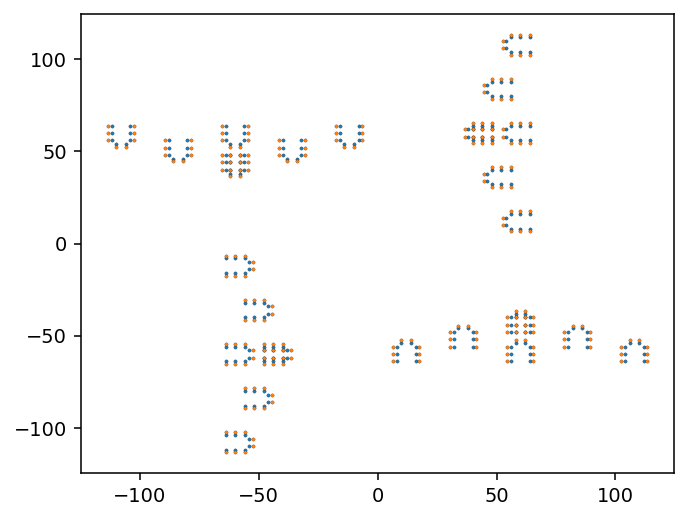

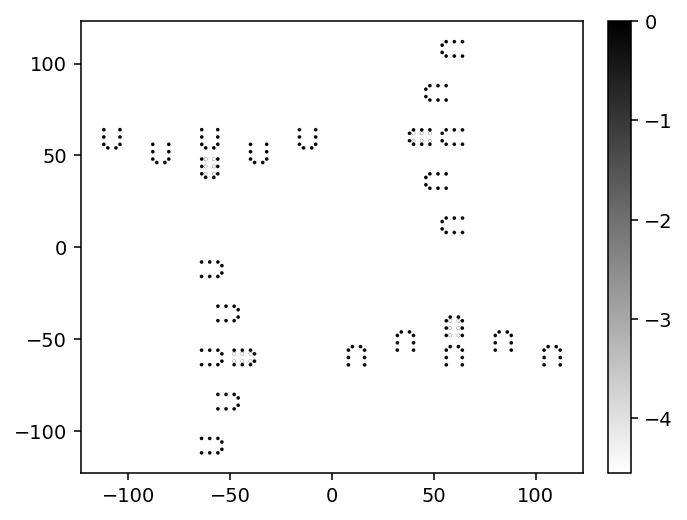

In [26]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, edgecolors="black", linewidths=.1)
im=ax.scatter(flowStats['EP_x'], flowStats['EP_z'], s=4*im_scaling, edgecolors="black", linewidths=.1)


fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["y"] - flowStats["EP_y"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)


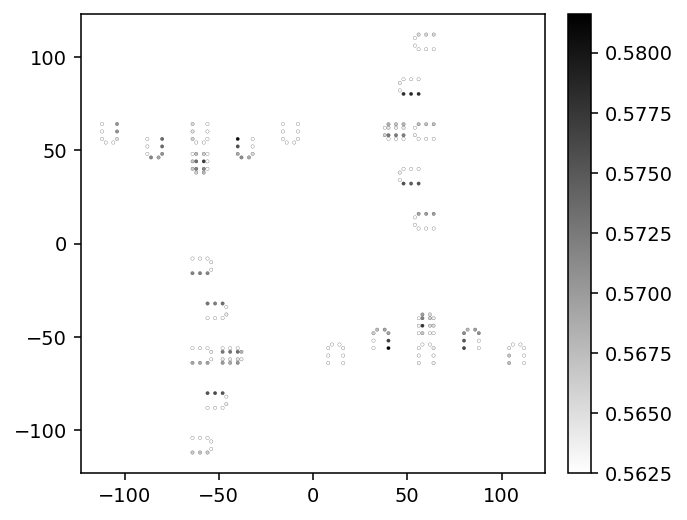

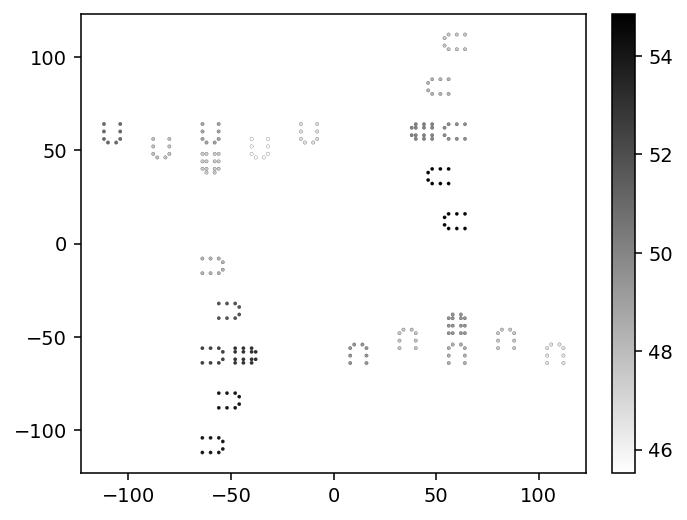

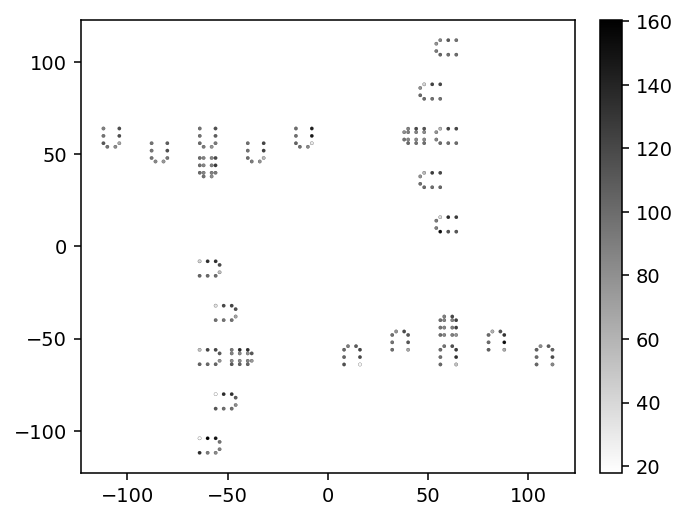

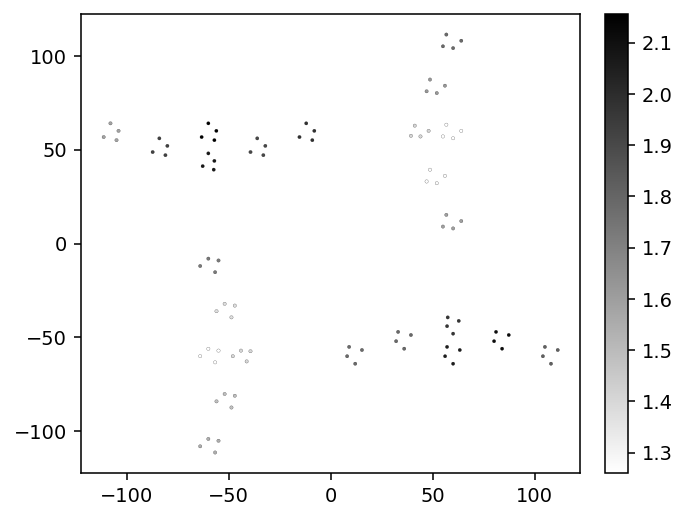

In [27]:

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["area"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EPR_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EP_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["EPR_mag"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

In [28]:
fig = px.scatter(data_frame = flowStats, x = "EPR_mag", y = "mean-mass_flux", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter(data_frame = flowStats, x = "EP_normal", y = "mean-mass_flux", color = "EP_shear", symbol = "roomType")
fig.update_xaxes(title_text='Component of Wind Normal to Window')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

In [29]:
fig = px.scatter(data_frame = roomVentilation, x = "EPR_mag", y = "mean-mass_flux", color = "roomType", symbol="roomType")
fig.update_xaxes(title_text='2H Wind Speed')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 
fig = px.scatter_3d(data_frame = roomVentilation, x = "EP_normal_mag", y = "EP_normal_sum",  z = "mean-mass_flux", color = "roomType", symbol = "roomType")
fig.update_xaxes(title_text='Magnitude/Sum of Window Normal Velocities')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()

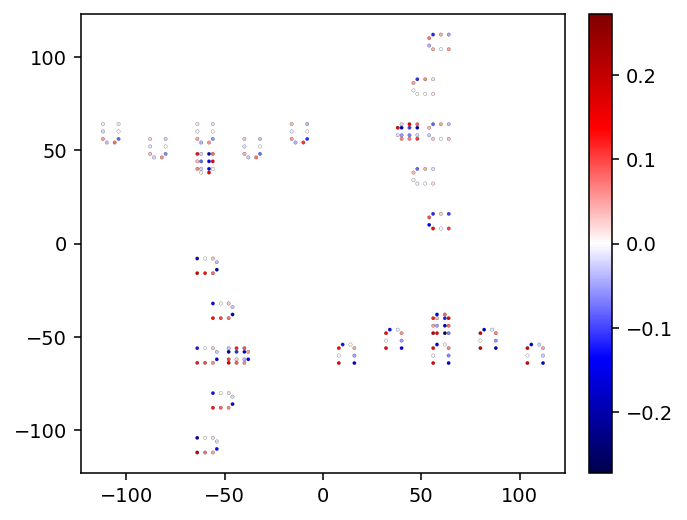

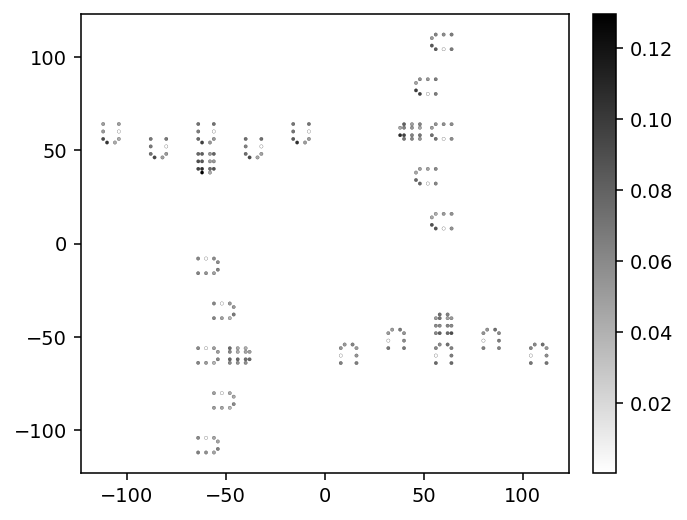

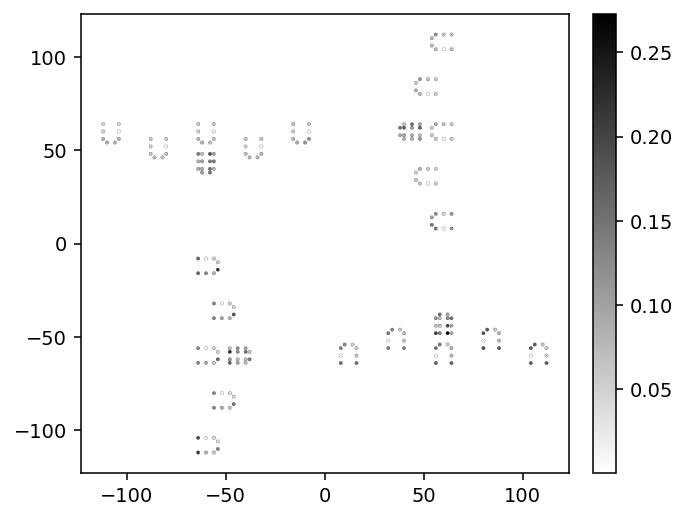

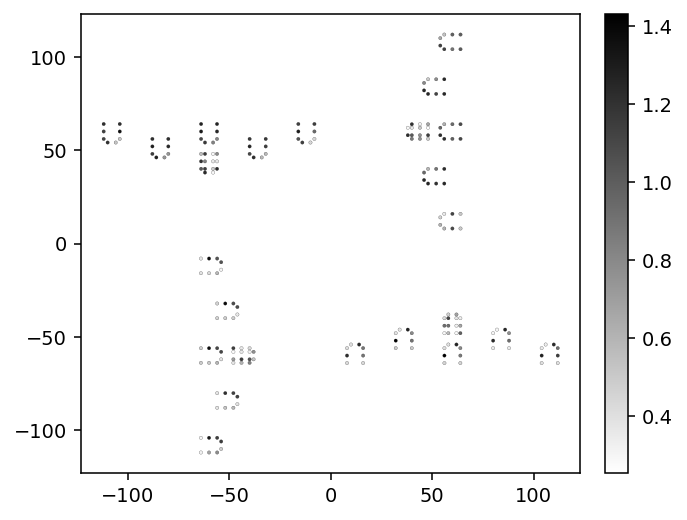

In [30]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-mass_flux"], cmap='seismic', edgecolors="black", linewidths=.1, norm=colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/mean-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rms-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/net-mass_fluxInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms-mass_flux"]/flowStats["net-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rms-mass_fluxOnet-mass_fluxInterior', bbox_inches="tight")

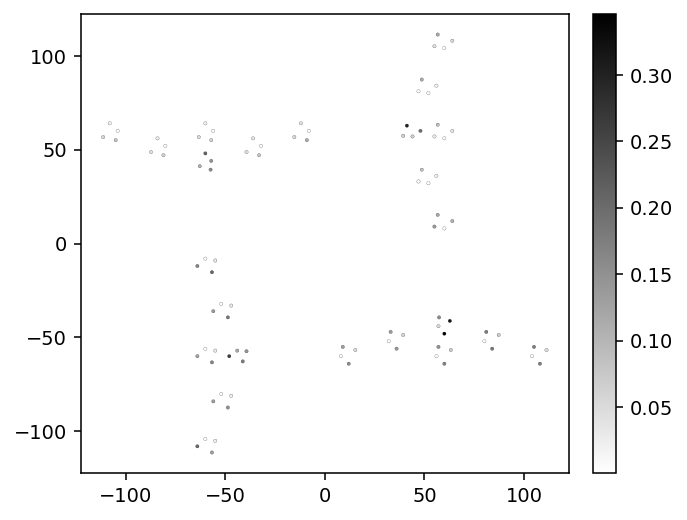

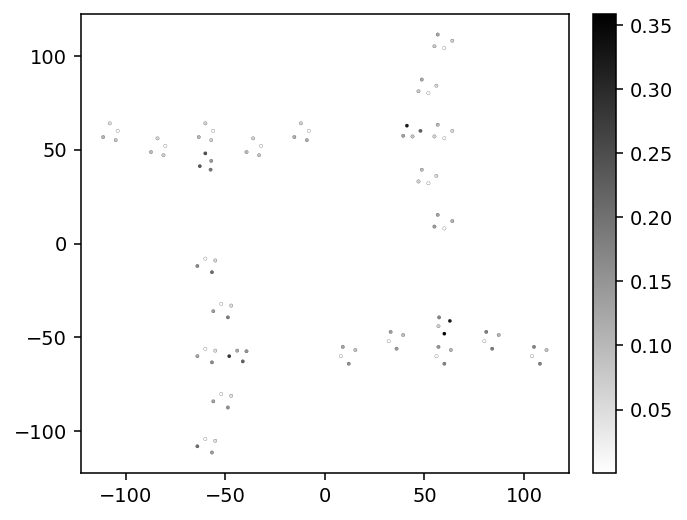

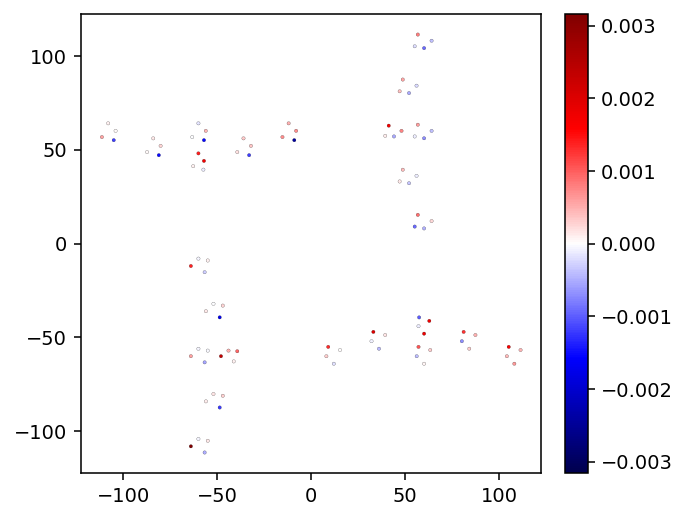

In [31]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

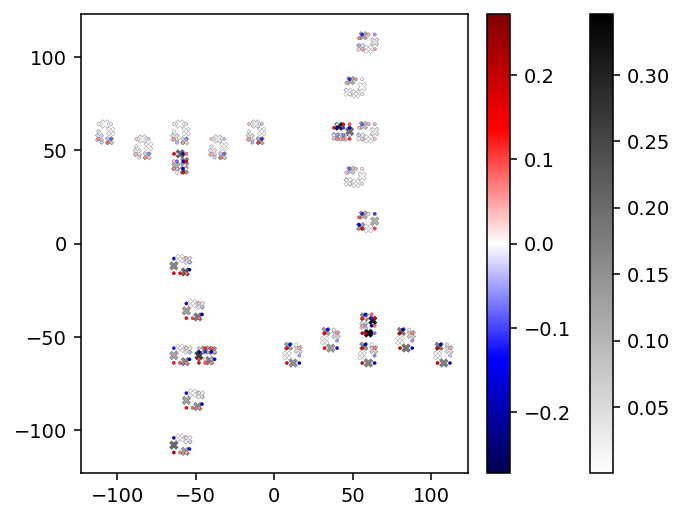

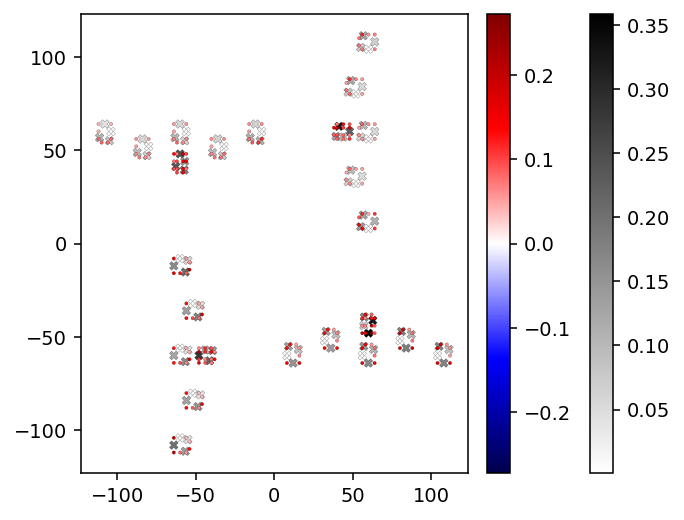

In [32]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean-mass_flux"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowsRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["net-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net-mass_flux"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowsRooms', bbox_inches="tight")

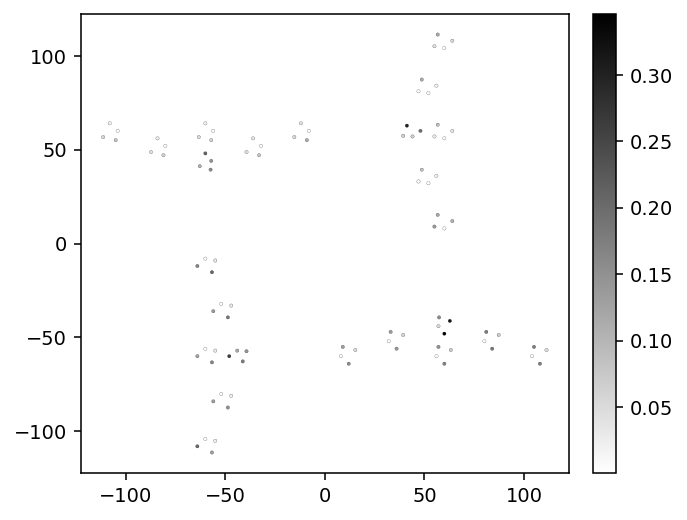

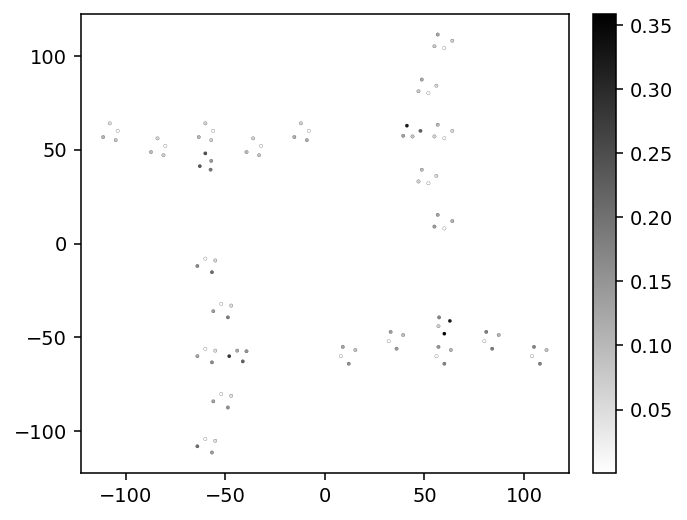

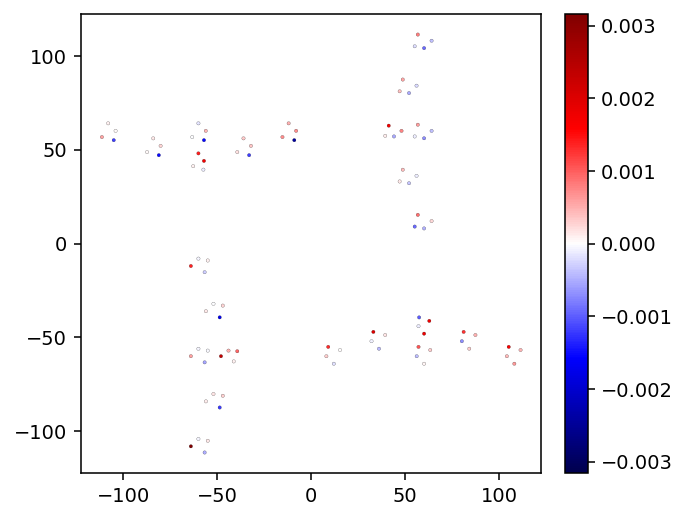

In [33]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net-mass_flux"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning:

33.

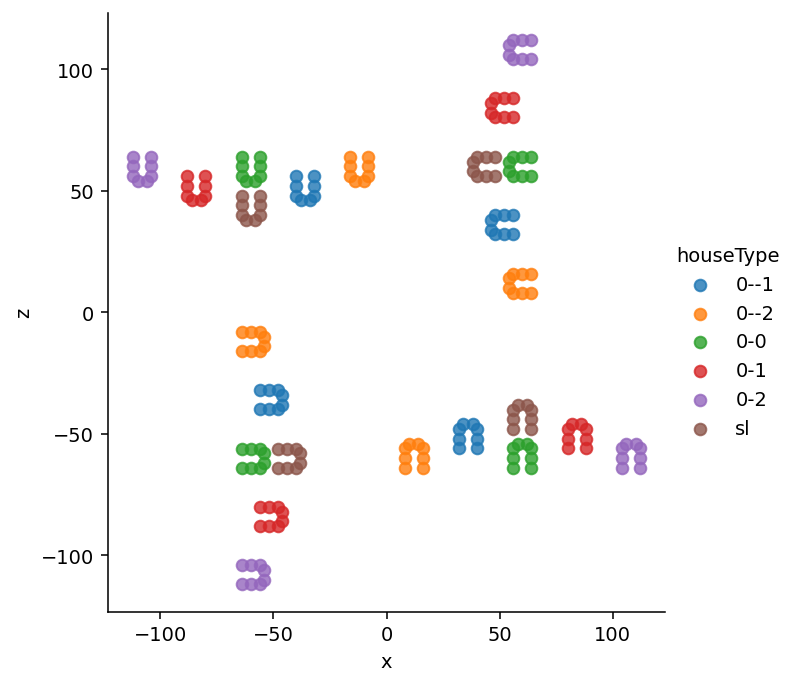

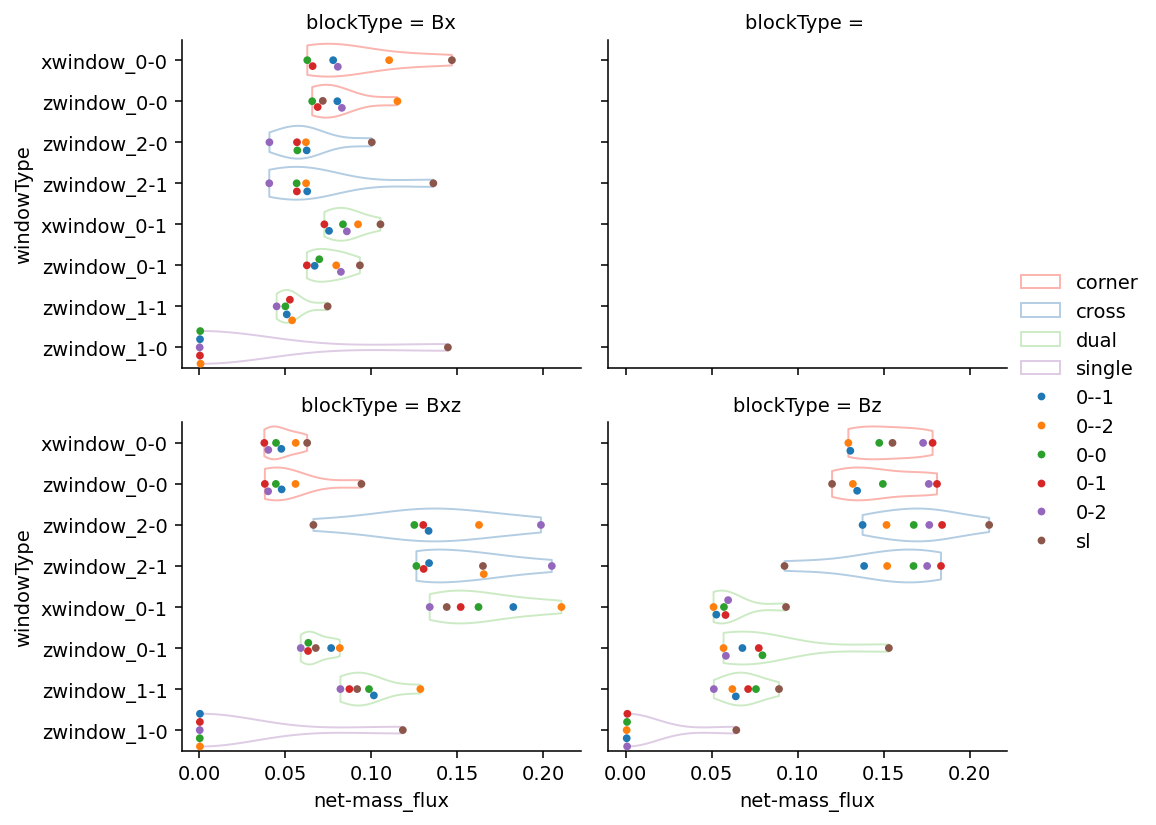

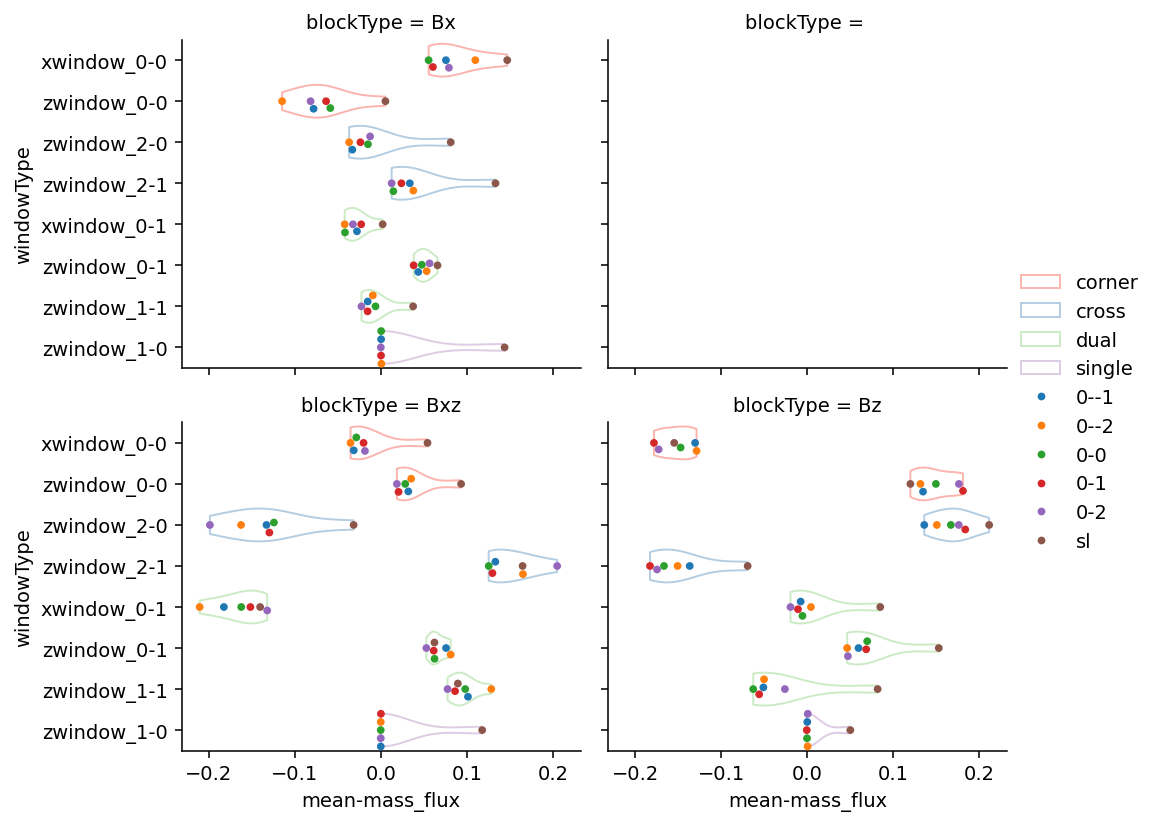

In [34]:
dfWindows = flowStats.loc[flowStats["openingType"].isin(["xwindow", "zwindow"])]

sns.lmplot(data = dfWindows, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/windowKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net-mass_flux", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "windowType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net-mass_flux", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowViolins', bbox_inches="tight")

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-mass_flux", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean-mass_flux", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the s

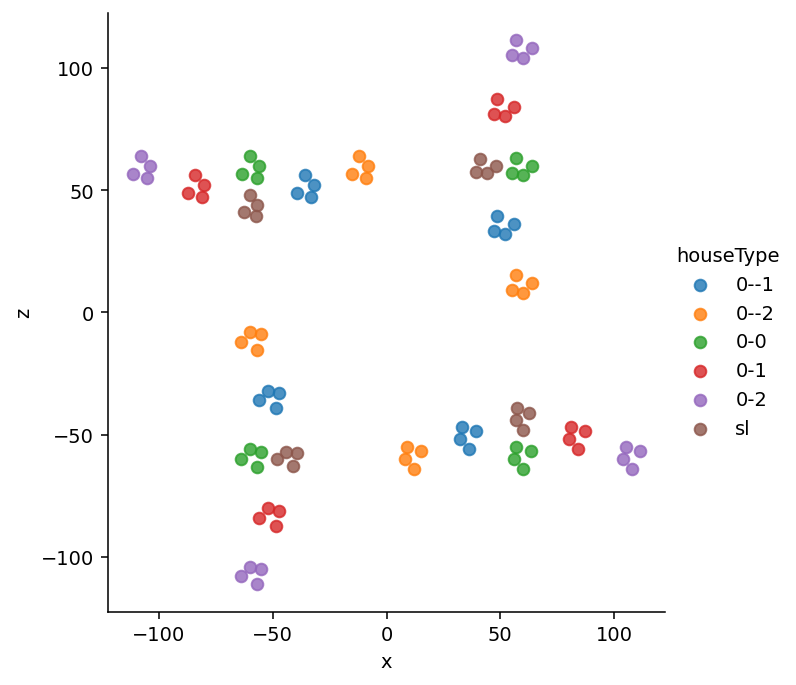

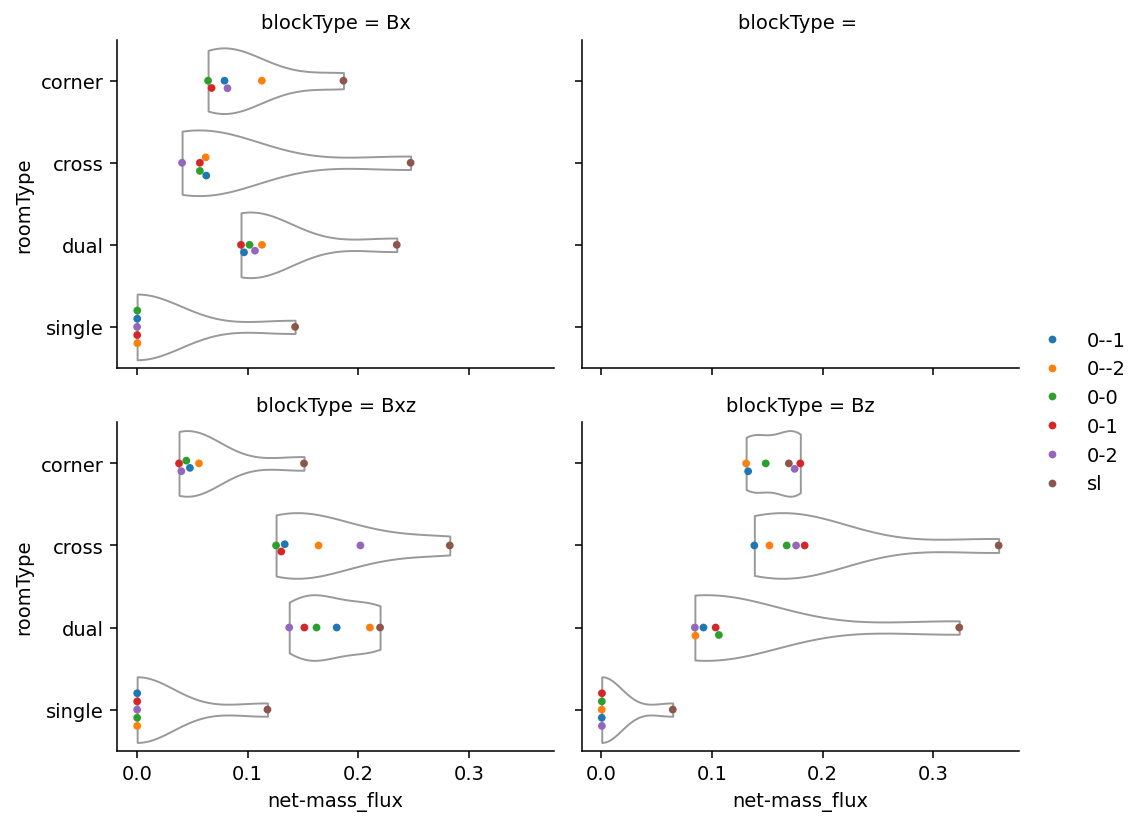

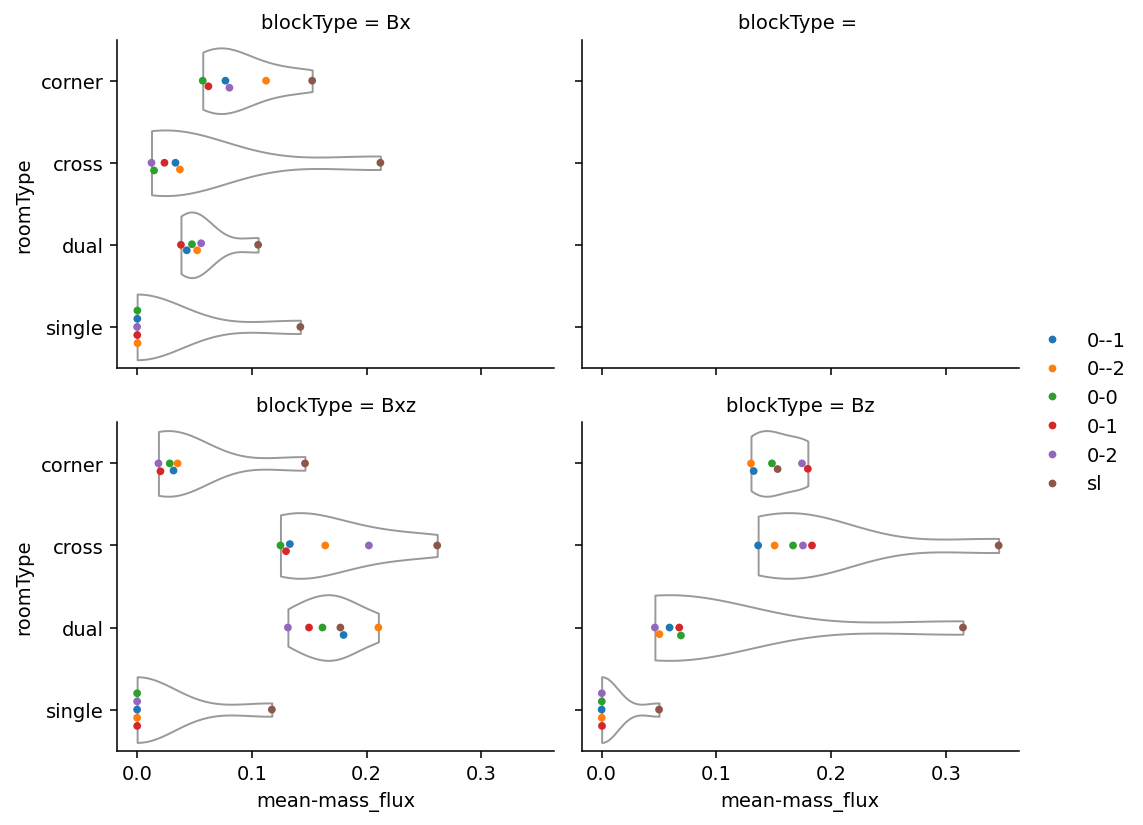

In [35]:
sns.lmplot(data = roomVentilation, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/roomKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net-mass_flux", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "roomType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net-mass_flux", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRoomViolins', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean-mass_flux", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean-mass_flux", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRoomViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning:

Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.



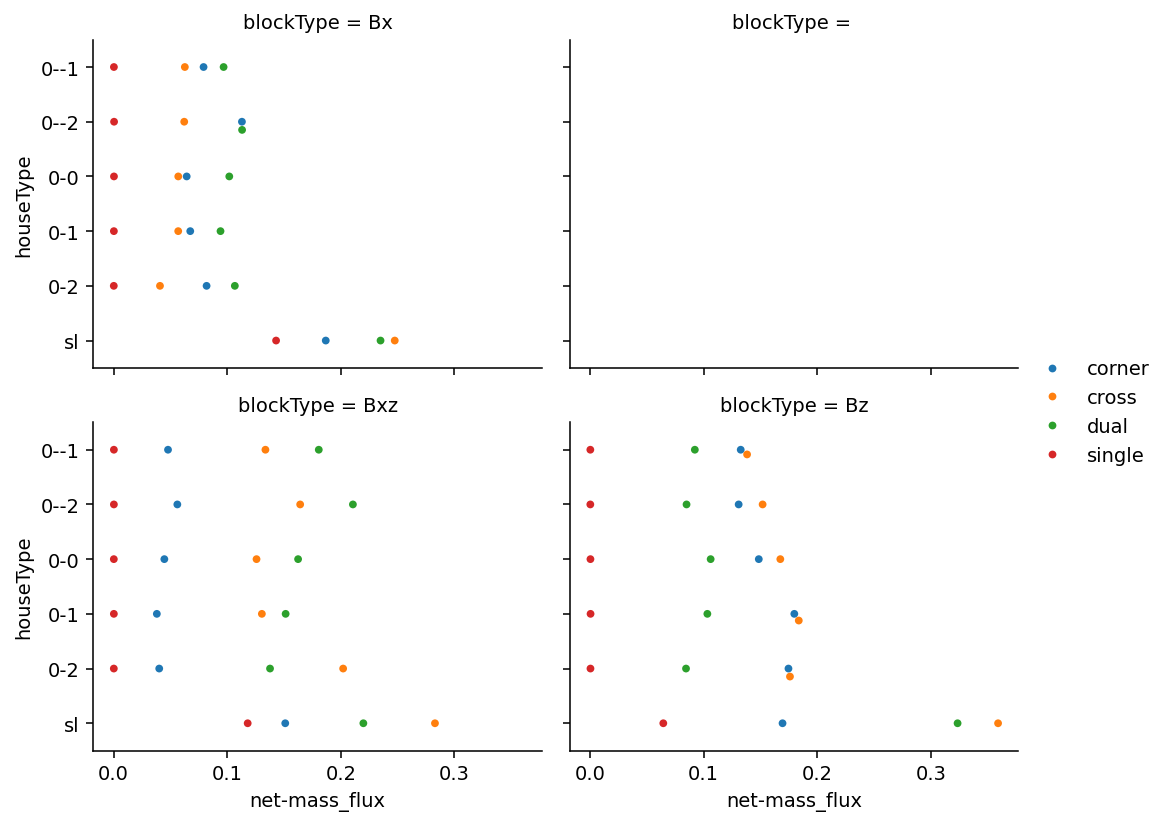

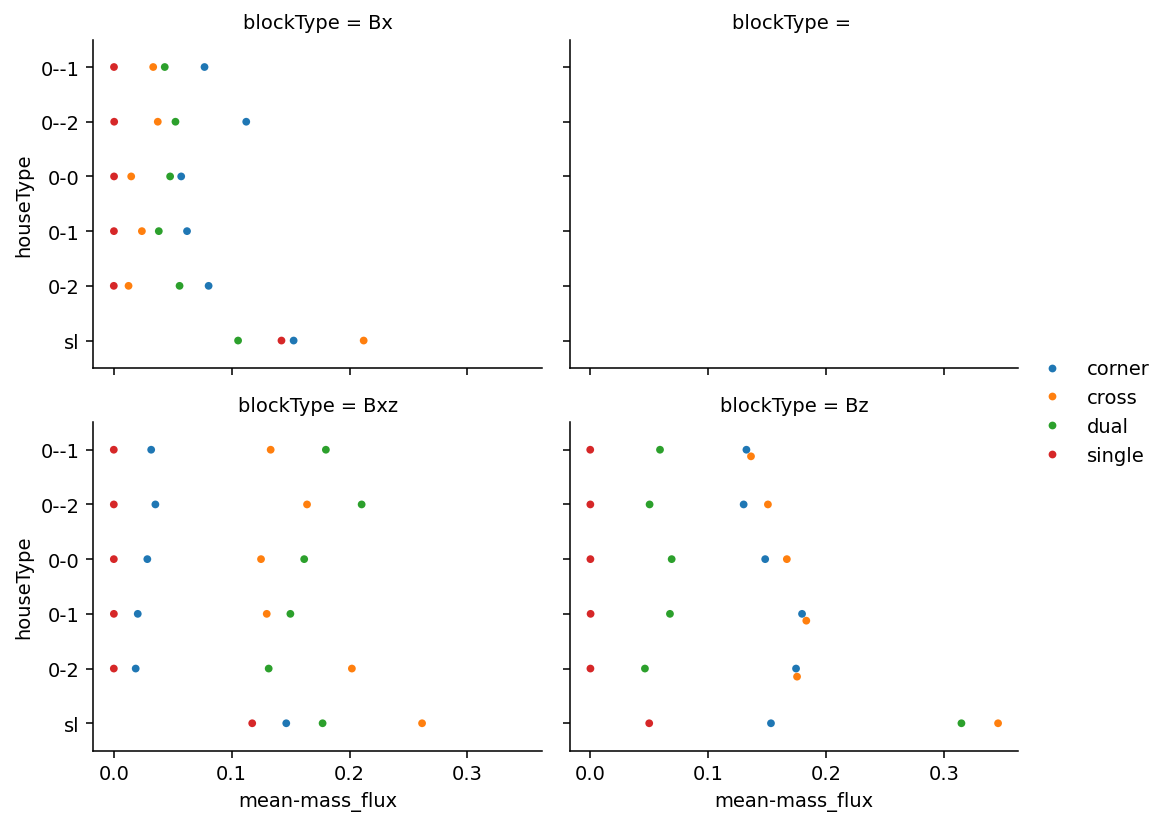

In [36]:
g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "net-mass_flux", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netHouseByRoom', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "mean-mass_flux", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanHouseByRoom', bbox_inches="tight")